## NSE STOCK PREDICTION 

In [237]:
import pandas as pd

In [238]:
df=pd.read_csv('NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv')

In [239]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


In [240]:
df.shape

(1481, 7)

In [241]:
# checking for the null values

In [242]:
df[df['Open'].isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume
151,2016-08-12,NaN,NaN,NaN,NaN,NaN,NaN
493,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN
739,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN
937,2019-10-27,NaN,NaN,NaN,NaN,NaN,NaN
1201,2020-11-14,NaN,NaN,NaN,NaN,NaN,NaN
1233,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN


###### As its time series data, the flow of the data is very essential(all the ups and downs), and if we replace the null columns with the mean/median, it can change the meaning of data unnecessarily so replacing the previous day's data at the place of null data so that the consistency and flow will be maintained instead of fluctation 

In [243]:
# taking the index numbers of row with empty column
null_index=df[df['Open'].isnull()].index

In [244]:
null_index

Int64Index([151, 493, 739, 937, 1201, 1233], dtype='int64')

In [245]:
# replacing the null rows with one day previous record
for i in null_index:
    p= i-1       # taking the previous record's index in p 
    print(df.iloc[p,:])
    print('**********')
    df.iloc[i,:]=df.iloc[p,:]      # assigning the null record with previous day's record

Date          2016-08-11
Open         8572.799805
High         8601.150391
Low          8540.049805
Close        8592.150391
Adj Close    8592.150391
Volume          189200.0
Name: 150, dtype: object
**********
Date           2017-12-29
Open         10492.349609
High         10538.700195
Low          10488.650391
Close        10530.700195
Adj Close    10530.700195
Volume           152000.0
Name: 492, dtype: object
**********
Date           2018-12-31
Open         10913.200195
High         10923.549805
Low          10853.200195
Close        10862.549805
Adj Close    10862.549805
Volume           180900.0
Name: 738, dtype: object
**********
Date           2019-10-25
Open         11646.150391
High         11646.900391
Low              11490.75
Close        11583.900391
Adj Close    11583.900391
Volume           812000.0
Name: 936, dtype: object
**********
Date           2020-11-13
Open         12659.700195
High         12735.950195
Low          12607.700195
Close        12719.950195
Adj C

In [246]:
null_index=df[df['Open'].isnull()].index

In [247]:
null_index

Int64Index([], dtype='int64')

In [248]:
df.shape

(1481, 7)

In [249]:
# for watching the graph of close, so taking close in another dataframe
df1=df.reset_index()['Close']

In [250]:
df1.head()

0    7791.299805
1    7784.649902
2    7741.000000
3    7568.299805
4    7601.350098
Name: Close, dtype: float64

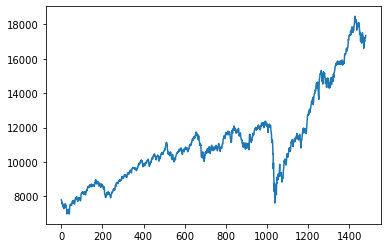

In [251]:
# visualizing close column
import matplotlib.pyplot as plt
plt.plot(df1)

as we can observe that the sale price suddenly fall from 12000 to 8000 on 1000 unit and also boomed up there onwards to 18000 at unit around 1400.

In [252]:
### LSTM are sensitive to the scale of the data. so we will transform data between 0 to 1 by  applying MinMax scaler 

In [253]:
import numpy as np

In [254]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))           # we will here scale between 0 to 1
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [255]:
df1

array([[0.07132518],
       [0.07074726],
       [0.06695374],
       ...,
       [0.89019627],
       [0.88935758],
       [0.90240257]])

 as we need data in sequence so we cannot split train and test data using sklearn's train_test_split, as it randomized the data,
so sequentially taking the data 

In [256]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [257]:
training_size,test_size

(1036, 445)

In [258]:
import numpy
# convert an array of values into a dataset matrix
def generate_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   element
        dataX.append(a)   # 100th element 
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [259]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 150
X_train, y_train = generate_dataset(train_data, time_step)
X_test, ytest = generate_dataset(test_data, time_step)

In [260]:
print(X_train)

[[0.07132518 0.07074726 0.06695374 ... 0.15128466 0.14840805 0.13946088]
 [0.07074726 0.06695374 0.05194475 ... 0.14840805 0.13946088 0.14092532]
 [0.06695374 0.05194475 0.05481708 ... 0.13946088 0.14092532 0.14092532]
 ...
 [0.34844802 0.34995583 0.33824501 ... 0.30251293 0.30311695 0.22765928]
 [0.34995583 0.33824501 0.34568869 ... 0.30311695 0.22765928 0.25938495]
 [0.33824501 0.34568869 0.337628   ... 0.22765928 0.25938495 0.19352625]]


In [261]:
print(X_train.shape), print(y_train.shape)

(885, 150)
(885,)


(None, None)

In [262]:
print(X_test.shape), print(ytest.shape)

(294, 150)
(294,)


(None, None)

In [263]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [264]:
X_train.shape

(885, 150, 1)

In [265]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [266]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [267]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 150, 50)           10400     
                                                                 
 lstm_34 (LSTM)              (None, 150, 50)           20200     
                                                                 
 lstm_35 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [268]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 33s 644ms/step - loss: 0.0256 - val_loss: 0.1203
Epoch 2/100
14/14 [==============================] - 7s 517ms/step - loss: 0.0069 - val_loss: 0.0521
Epoch 3/100
14/14 [==============================] - 7s 483ms/step - loss: 0.0048 - val_loss: 0.0203
Epoch 4/100
14/14 [==============================] - 7s 518ms/step - loss: 0.0039 - val_loss: 0.0158
Epoch 5/100
14/14 [==============================] - 7s 496ms/step - loss: 0.0030 - val_loss: 0.0057
Epoch 6/100
14/14 [==============================] - 7s 475ms/step - loss: 0.0030 - val_loss: 0.0084
Epoch 7/100
14/14 [==============================] - 7s 496ms/step - loss: 0.0027 - val_loss: 0.0103
Epoch 8/100
14/14 [==============================] - 7s 470ms/step - loss: 0.0026 - val_loss: 0.0036
Epoch 9/100
14/14 [==============================] - 7s 494ms/step - loss: 0.0028 - val_loss: 0.0092
Epoch 10/100
14/14 [==============================] - 7s 468ms/step - loss: 0.0025 - val_l

In [269]:
import tensorflow as tf

In [270]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [271]:
# as we have already scaled the data so we will  Tansform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [272]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

10458.808577157753

In [273]:
import math
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

14866.519274930642

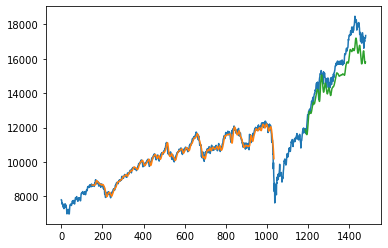

In [284]:
### Plotting 
# shift train predictions for plotting
look_back=150
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


* blue color is the first 100 training data as we have given 99 features at first step and 100th element was the output for it.
* Orange color is in combination with blue means the data is trained and tested there of training dataset.
* blue color is the again first 100 testing data as we have given 99 features at first step and 100th element was the output for it.
* green color is the test_data predicted output,


# Preparing for predicting data for further 30 days

In [286]:
len(test_data)

445

In [287]:
# as we have taken 150 days before so we will take test data 445-150
445-150

295

In [288]:
x_input=test_data[295:].reshape(1,-1)
x_input.shape

(1, 150)

In [289]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [290]:
temp_input

[0.7356786663594304,
 0.7484670941773504,
 0.7477761603508364,
 0.7478935367718724,
 0.7578140080922466,
 0.7560671958428622,
 0.7631415225177476,
 0.7621376697817286,
 0.7530340805963369,
 0.7619334704969332,
 0.767286955311413,
 0.7683733024695742,
 0.77336184260079,
 0.764523305174974,
 0.7579053292154103,
 0.7572056536836762,
 0.762693913507646,
 0.7649752425397849,
 0.7575185725931814,
 0.7665135270627568,
 0.7725883294432401,
 0.7686210405495897,
 0.7628634006113348,
 0.7605212191913235,
 0.7569145466262281,
 0.7605820715791962,
 0.7703287273542645,
 0.7689295461954919,
 0.7742657174173191,
 0.7610774629172412,
 0.757766225851211,
 0.7580095505807156,
 0.7684167563559008,
 0.7720321706262161,
 0.7781374416550826,
 0.7780679324708837,
 0.7632067033472374,
 0.7527516303352151,
 0.7694335943298631,
 0.7722146430547561,
 0.7694683913329554,
 0.7626895850660291,
 0.7594696691231624,
 0.7654706337909221,
 0.7641322201980361,
 0.7747437101669101,
 0.796088225149524,
 0.8072167484907125,

In [296]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=150
i=0
while(i<30):           
    if(len(temp_input)>150):
        #print(temp_input)
        x_input=np.array(temp_input[1:])   # shifting one input to the right
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))       # reshaping 
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])                                 # adding predi
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.78486353]
151
1 day input [0.74846709 0.74777616 0.74789354 0.75781401 0.7560672  0.76314152
 0.76213767 0.75303408 0.76193347 0.76728696 0.7683733  0.77336184
 0.76452331 0.75790533 0.75720565 0.76269391 0.76497524 0.75751857
 0.76651353 0.77258833 0.76862104 0.7628634  0.76052122 0.75691455
 0.76058207 0.77032873 0.76892955 0.77426572 0.76107746 0.75776623
 0.75800955 0.76841676 0.77203217 0.77813744 0.77806793 0.7632067
 0.75275163 0.76943359 0.77221464 0.76946839 0.76268959 0.75946967
 0.76547063 0.76413222 0.77474371 0.79608823 0.80721675 0.81032803
 0.80542648 0.80716897 0.80906787 0.80925475 0.81639426 0.8307079
 0.83365852 0.83813852 0.83416249 0.82387699 0.82787033 0.83900759
 0.83988109 0.84007663 0.84601233 0.86564058 0.88312195 0.87825952
 0.8919823  0.89975613 0.90446663 0.90310208 0.9023547  0.9037235
 0.90251121 0.90465776 0.91677698 0.92634125 0.92248692 0.90612654
 0.92047497 0.91914097 0.94315349 0.94578245 0.94594761 0.93669193
 0.93345037 0.92535488 0.91787215 0.

In [293]:
new_day=np.arange(1,151)
pred_day=np.arange(151,181)  # for 30 days prediction adding 30 to 151

In [294]:
len(df1)

1481

In [297]:
 # previous 150 days for future prediction 
1481-150

1331

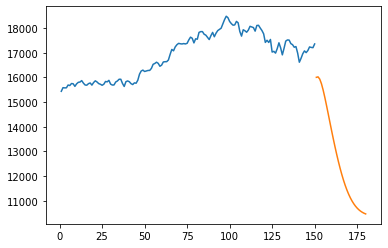

In [298]:
plt.plot(new_day,scaler.inverse_transform(df1[1331:]))             # previous 150 days for future prediction
plt.plot(pred_day,scaler.inverse_transform(lst_output))

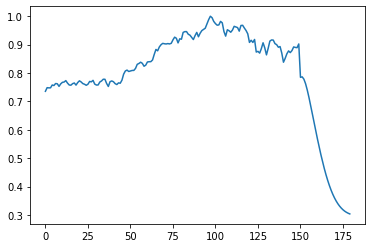

In [299]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1331:])

In [300]:
df3=scaler.inverse_transform(df3).tolist()

## FOR FURTHER 30 DAYS PREDICTION

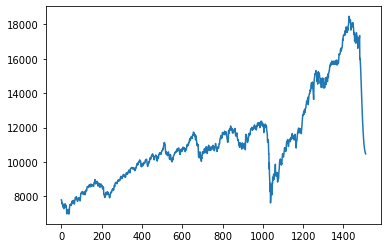

In [301]:
plt.plot(df3)